In [8]:
import fileinput
import sys
import os
import argparse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def list_file_n_foldes(dir_dist_path):
    """Lista quais sao as pastas e arquivos de um dado caminho"""
    # LISTA TUDO DENTRO DA PASTA
    arquivos = os.listdir(str(dir_dist_path))
    folders = []
    files = []
    for arquivo in arquivos:
        if os.path.isdir(dir_dist_path + r'/' + arquivo):
            folders.append(dir_dist_path + r'/' + arquivo)
        else:
            files.append(dir_dist_path + r'/' + arquivo)
    return files, folders

# WINDOWS
# folder_path = r'\\wsl.localhost\Ubuntu-20.04\home\william\ns-3\ns-allinone-3.40\ns-3.40\resultados_william'

# UBUNTU
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william/2_link_distance_6_24hz'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/resultados_william'
# folder_path = r'/home/william/ns-3/ns-allinone-3.40/ns-3.40/testes_emlsr'
# folder_path = r'/home/william/ns-3/ns-allinone-3.43/ns-3.43/testes_emlsr'
folder_path = r'/home/william/downloads/results_teste3'
# home\william\downloads\results_teste

banda_filter = 40
gi_filter = 800

files, folders = list_file_n_foldes(folder_path)

# print(files)
# print(folders)

columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
all_data = pd.DataFrame(columns=columns)
# print(all_data)

for folder in folders:
    sim_files, sub_folders = list_file_n_foldes(folder)
    # for file_t in sim_files:
    #     print(f"sim_file: {file_t}")
    for i, file_t in enumerate(sim_files):
        print(f"arquivo: {i}")
        # PEGA DADOS DO TITULO DO ARQUIVO
        path_names = file_t.split('/')
        file_name = path_names[-1]
        simulation_title_parts = file_name.split('_')

        # standard = simulation_title_parts[0]
        # numSTAs = int(simulation_title_parts[-1].split('.')[0])
        # frequency = int(simulation_title_parts[1].replace('GHz', ''))
        # frequency2 = 0
        # frequency3 = 0
        # if 'GHz' in simulation_title_parts[2]:
        #     frequency2 = int(simulation_title_parts[2].replace('GHz', ''))
        # if len(simulation_title_parts) > 3 and 'GHz' in simulation_title_parts[3]:
        #     frequency3 = int(simulation_title_parts[3].replace('GHz', 
        
        # print('dados:', standard, numSTAs, frequency, frequency2, frequency3)

        standard = 'be'
        numSTAs = int(simulation_title_parts[-1].split('.')[0])
        frequency = int(simulation_title_parts[2].replace('GHz', ''))
        frequency2 = int(simulation_title_parts[3].replace('GHz', ''))
        frequency3 = int(simulation_title_parts[4].replace('GHz', ''))
        mlo_mode = simulation_title_parts[5]

        if (frequency == 2) : frequency = 2.4
        if (frequency2 == 2) : frequency2 = 2.4
        if (frequency3 == 2) : frequency3 = 2.4
        
        print(f'NOME : {simulation_title_parts}')
        print('dados:', standard, mlo_mode, numSTAs, frequency, frequency2, frequency3)
        # continue
        
        file_path = file_t
        print(f"file_path: {file_path}")

        # Ler o arquivo de texto
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        # print(f"lines: {len(lines)}")

        # Processar as linhas para extrair as informações
        data = []
        for line in lines[1:]:  # Pular o cabeçalho

            if 'Command' in line or 'MCS' in line or 'ninja' in line or 'Process' in line:
                continue

            # print(line)
            # RETIRA AS UNIDADES DOS DADOS
            line = line.replace('Mbit/s', '')
            line = line.replace('MHz', '')
            line = line.replace('ns', '')
            # print(line)

            # Dividir a linha por tabulações ou múltiplos espaços
            parts = line.split()
            print('parts:', parts)

            if not (parts[0]).isdigit():
                 continue
            
            # # Adicionar os dados à lista
            mcs_value = int(parts[0])
            channel_width = int(parts[1])
            gi = int(parts[2])
            throughput = float(parts[3])

            # ADICIONA OS DADOS
            data.append([mcs_value, channel_width, gi, throughput, frequency, frequency2, frequency3, numSTAs, mlo_mode])

        # Criar um DataFrame a partir dos dados
        columns = ['MCS', 'Channel_width', 'GI', 'Throughput', 'Frequency', 'Frequency2', 'Frequency3', 'numSTAs', 'STD']
        df = pd.DataFrame(data, columns=columns)

        # print(df)
        all_data = pd.concat([all_data, df], ignore_index=True)

        # FILTRO
        # subset_complex = df[((df['Channel_width'] == banda_filter) & (df['GI'] == gi_filter))]

        # TODO > DESCOBRIR COMO PEGA 1 VALOR ESPECIFICO DO DATA FRAME
        # TODO > POR ENQUANTO TO PASSANDO O MAIOR VALOR DO DF
        tput = all_data['Throughput']
        # print(tput)

        # linha_data = {'Distance': dist, 'Throughput': tput.max()}

print("all_data")
print(all_data)


arquivo: 0
NOME : ['Sim', '3', '6', '5', '0', 'emlsr', '10.out']
dados: be emlsr 10 6 5 0
file_path: /home/william/downloads/results_teste3/Simulations/Sim_3_6_5_0_emlsr_10.out
parts: ['0', '20', '3200', '12.0058']
parts: ['0', '20', '1600', '12.0092']
parts: ['0', '20', '800', '14.1109']
parts: ['0', '40', '3200', '24.057']
parts: ['0', '40', '1600', '24.0638']
parts: ['NS_ASSERT', 'failed,', 'cond="m_ptr",', 'msg="Attempted', 'to', 'dereference', 'zero', 'pointer",', '+1.030978000s', '10', 'file=/home/lance/william/3/-allinone-3.43/-3.43/src/core/model/ptr.h,', 'line=707']
parts: ['NS_FATAL,', 'terminating']
parts: ['terminate', 'called', 'without', 'an', 'active', 'exception']
parts: ['srun:', 'error:', 'nemesis:', 'task', '0:', 'Exited', 'with', 'exit', 'code', '250']
arquivo: 1
NOME : ['Sim', '1', '5', '0', '0', 'emlsr', '1.out']
dados: be emlsr 1 5 0 0
file_path: /home/william/downloads/results_teste3/Simulations/Sim_1_5_0_0_emlsr_1.out
parts: ['0', '20', '3200', '6.20144']
parts

In [3]:
pd.options.mode.copy_on_write = True

all_data

,MCS,Channel_width,GI,Throughput,Frequency,Frequency2,Frequency3,numSTAs,STD
0,0,20,3200,12.0058,6,5,0,10,emlsr
1,0,20,1600,12.0092,6,5,0,10,emlsr
2,0,20,800,14.1109,6,5,0,10,emlsr
3,0,40,3200,24.0570,6,5,0,10,emlsr
4,0,40,1600,24.0638,6,5,0,10,emlsr
...,...,...,...,...,...,...,...,...,...
7099,13,20,1600,121.7330,2.4,0,0,5,emlsr
7100,13,20,800,141.7290,2.4,0,0,5,emlsr
7101,13,40,3200,229.7750,2.4,0,0,5,emlsr
7102,13,40,1600,229.7750,2.4,0,0,5,emlsr


In [9]:
pd.options.mode.copy_on_write = True

all_data

,MCS,Channel_width,GI,Throughput,Frequency,Frequency2,Frequency3,numSTAs,STD
0,0,20,3200,12.0058,6,5,0,10,emlsr
1,0,20,1600,12.0092,6,5,0,10,emlsr
2,0,20,800,14.1109,6,5,0,10,emlsr
3,0,40,3200,24.0570,6,5,0,10,emlsr
4,0,40,1600,24.0638,6,5,0,10,emlsr
...,...,...,...,...,...,...,...,...,...
7099,13,20,1600,121.7330,2.4,0,0,5,emlsr
7100,13,20,800,141.7290,2.4,0,0,5,emlsr
7101,13,40,3200,229.7750,2.4,0,0,5,emlsr
7102,13,40,1600,229.7750,2.4,0,0,5,emlsr


In [10]:
# FILTRA OS CW ABAIXO DE 40
all_data = all_data[(all_data['Channel_width'] <= 40)]

all_data["CW_GI"] = all_data["Channel_width"].astype(str) +"_"+  all_data["GI"].astype(str)
all_data["F1_F2_F3"] = all_data["Frequency"].astype(str) +"_"+all_data["Frequency2"].astype(str)+"_"+all_data["Frequency3"].astype(str)

df_selected = all_data[['STD', 'F1_F2_F3', 'MCS' ,'CW_GI', 'numSTAs', 'Throughput']] 
# df_selected.plot()

df_selected

,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput
0,emlsr,6_5_0,0,20_3200,10,12.0058
1,emlsr,6_5_0,0,20_1600,10,12.0092
2,emlsr,6_5_0,0,20_800,10,14.1109
3,emlsr,6_5_0,0,40_3200,10,24.0570
4,emlsr,6_5_0,0,40_1600,10,24.0638
...,...,...,...,...,...,...
7099,emlsr,2.4_0_0,13,20_1600,5,121.7330
7100,emlsr,2.4_0_0,13,20_800,5,141.7290
7101,emlsr,2.4_0_0,13,40_3200,5,229.7750
7102,emlsr,2.4_0_0,13,40_1600,5,229.7750


In [11]:
df_selected

,STD,F1_F2_F3,MCS,CW_GI,numSTAs,Throughput
0,emlsr,6_5_0,0,20_3200,10,12.0058
1,emlsr,6_5_0,0,20_1600,10,12.0092
2,emlsr,6_5_0,0,20_800,10,14.1109
3,emlsr,6_5_0,0,40_3200,10,24.0570
4,emlsr,6_5_0,0,40_1600,10,24.0638
...,...,...,...,...,...,...
7099,emlsr,2.4_0_0,13,20_1600,5,121.7330
7100,emlsr,2.4_0_0,13,20_800,5,141.7290
7101,emlsr,2.4_0_0,13,40_3200,5,229.7750
7102,emlsr,2.4_0_0,13,40_1600,5,229.7750


[1 5 10]
categories: [1, 5, 10]
subcategories: ['str' 'emlsr']
     MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
6200  10  str  2.4_5_6  40_800       1     623.575
[623.575]
     MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput
4713  10  emlsr  2.4_5_6  40_800       1     195.962
[195.962]
     MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
6116  10  str  2.4_5_6  40_800       5      592.28
[592.28]
     MCS    STD F1_F2_F3   CW_GI numSTAs  Throughput
3617  10  emlsr  2.4_5_6  40_800       5      587.17
[587.17]
    MCS  STD F1_F2_F3   CW_GI numSTAs  Throughput
832  10  str  2.4_5_6  40_800      10      548.97
[548.97]
Empty DataFrame
Columns: [MCS, STD, F1_F2_F3, CW_GI, numSTAs, Throughput]
Index: []
[]
values: [[623.575, 195.962], [592.28, 587.17], [548.97, 0]]


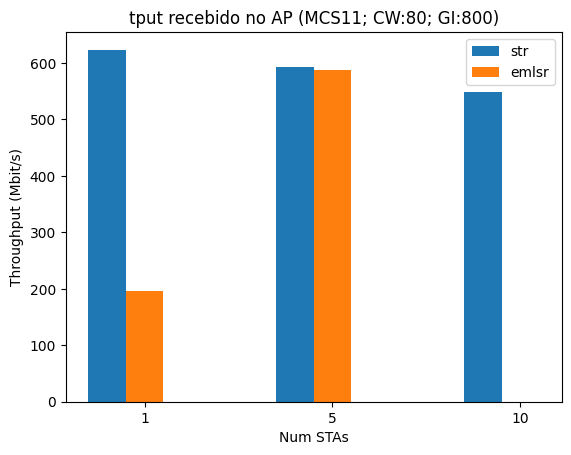

In [13]:
import matplotlib.pyplot as plt
import numpy as np

all_data = df_selected.sort_values(by='numSTAs')

filtered_by_cw_gi = all_data.filter(items=['MCS', 'STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput'])\
                .where((all_data.CW_GI == '40_800') & (filtered_by_cw_gi.MCS == 10))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')

# print(filtered_by_cw_gi)

# Dados
categories = ['Categoria 1', 'Categoria 2', 'Categoria 3']
subcategories = ['Subcat A', 'Subcat B', 'Subcat C']
values = [[10, 15, 20], [20, 25, 30], [30, 35, 40]]

# DEFINE AS CATEGORIAS
categories = all_data['numSTAs'].unique()
print(categories)
categories = [categories[0], categories[1], categories[2],]

subcategories = all_data['STD'].unique()

print(f"categories: {categories}")
print(f"subcategories: {subcategories}")


# define os valores
values = []
for categorie in categories: 
    subvalues = []
    for subcategorie in subcategories:
        filtered_for_data = filtered_by_cw_gi.filter(items=['MCS','STD', 'F1_F2_F3', 'CW_GI', 'numSTAs', 'Throughput'])\
                .where((filtered_by_cw_gi.STD == subcategorie) & (filtered_by_cw_gi.numSTAs == categorie) & (filtered_by_cw_gi.F1_F2_F3 == "2.4_5_6"))\
                .dropna(how='any')\
                .sort_values(by='numSTAs')
        print(filtered_for_data)
        print(filtered_for_data['Throughput'].unique())
        if len(filtered_for_data['Throughput'].unique()) == 0:
            data = 0
        else:
            data = filtered_for_data['Throughput'].unique()[0]
        subvalues.append(data)
    values.append(subvalues)
print(f"values: {values}")

# Número de categorias e subcategorias
n_categories = len(categories)
n_subcategories = len(subcategories)


# Largura das barras
bar_width = 0.2
index = np.arange(n_categories)

# Plotar as barras
for i in range(n_subcategories):
    plt.bar(index + i * bar_width, [values[j][i] for j in range(n_categories)], bar_width, label=subcategories[i])

# Título e rótulos
plt.title('tput recebido no AP (MCS11; CW:80; GI:800)')
plt.xlabel('Num STAs')
plt.ylabel('Throughput (Mbit/s)')

# Rótulos das categorias
plt.xticks(index + bar_width, categories)
plt.legend()

# Mostrar gráfico
plt.show()